### Proceso de extracción, transformación y limpieza de los datos (ETL) de la base de datos de items

Para comenzar, se agregan las librerías necesarias.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import ast
warnings.filterwarnings('ignore')
from langdetect import detect
import re
from scipy import stats

Se guarda el archivo en una variable y se carga al dataframe

In [4]:
items_usuarios='australian_users_items.json'

Se crea una función para leer el archivo .json

In [9]:
def read_json_file(file_path):
    try:
        data_list = []

        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                try:
                    line_data = ast.literal_eval(line)
                    data_list.append(line_data)
                except (SyntaxError, ValueError) as e:
                    print(f"Error al evaluar la línea '{line}': {e}")

        if not data_list:
            raise ValueError("El archivo JSON está vacío o no contiene datos válidos.")

        df = pd.json_normalize(data_list, 'items', ['user_id', 'items_count', 'steam_id', 'user_url'])

        return df

    except FileNotFoundError:
        print(f"Error: El archivo '{file_path}' no se encontró.")
    except Exception as e:
        print(f"Error inesperado: {e}")

In [10]:
df_items=read_json_file(items_usuarios)

In [11]:
df_items.head(5)

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,items_count,steam_id,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


In [12]:
df_item=df_items[['user_id', 'steam_id', 'playtime_forever', 'playtime_2weeks', 'item_id', 'item_name', 'items_count']]

In [13]:
df_item.head(5)

,user_id,steam_id,playtime_forever,playtime_2weeks,item_id,item_name,items_count
0,76561197970982479,76561197970982479,6,0,10,Counter-Strike,277
1,76561197970982479,76561197970982479,0,0,20,Team Fortress Classic,277
2,76561197970982479,76561197970982479,7,0,30,Day of Defeat,277
3,76561197970982479,76561197970982479,0,0,40,Deathmatch Classic,277
4,76561197970982479,76561197970982479,0,0,50,Half-Life: Opposing Force,277


In [14]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   steam_id          object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   item_id           object
 5   item_name         object
 6   items_count       object
dtypes: int64(2), object(5)
memory usage: 275.2+ MB


In [15]:
df_item.isna().sum()*100/len(df_item)

user_id             0.0
steam_id            0.0
playtime_forever    0.0
playtime_2weeks     0.0
item_id             0.0
item_name           0.0
items_count         0.0
dtype: float64

In [17]:
df_item.replace('', np.nan,inplace=True)
df_item.replace('', np.nan,inplace=True)

In [18]:
df_item.isna().sum()*100/len(df_item)

user_id             0.0
steam_id            0.0
playtime_forever    0.0
playtime_2weeks     0.0
item_id             0.0
item_name           0.0
items_count         0.0
dtype: float64

In [19]:
df_item['item_id'] = df_item['item_id'].astype(int) 

In [20]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   steam_id          object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   item_id           int64 
 5   item_name         object
 6   items_count       object
dtypes: int64(3), object(4)
memory usage: 275.2+ MB


In [22]:
df_item[df_item['steam_id']=='76561197970982479']

,user_id,steam_id,playtime_forever,playtime_2weeks,item_id,item_name,items_count
0,76561197970982479,76561197970982479,6,0,10,Counter-Strike,277
1,76561197970982479,76561197970982479,0,0,20,Team Fortress Classic,277
2,76561197970982479,76561197970982479,7,0,30,Day of Defeat,277
3,76561197970982479,76561197970982479,0,0,40,Deathmatch Classic,277
4,76561197970982479,76561197970982479,0,0,50,Half-Life: Opposing Force,277
...,...,...,...,...,...,...,...
272,76561197970982479,76561197970982479,593,0,289130,Endless Legend,277
273,76561197970982479,76561197970982479,1495,0,268500,XCOM 2,277
274,76561197970982479,76561197970982479,0,0,461640,Sins Of The Demon RPG,277
275,76561197970982479,76561197970982479,793,0,379720,DOOM,277


Es posible evidenciar que la columna 'user_id' contiene valores diferentes de 'steam_id'. También se evidencia que 'user_id' es la columna que contiene valores identificadores para usuario. Al no ser relevante la columna 'steam_id' se procede a su eliminación.

In [23]:
df_items.drop(columns='steam_id', inplace=True)

In [24]:
df_items.head(5)

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,items_count,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...


Se hace conteo de datos duplicados y se eliminan.

In [25]:
df_items.duplicated().sum()

np.int64(59104)

In [26]:
df_items.drop_duplicates(inplace=True)
df_items.head(5)

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,items_count,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...


Se identifica que los valores de tiempo de juego están expresados en minutos. Se visualiza la distribución de 'playtime_forever' y 'playtime_2weeks'

In [27]:
df_items['playtime_forever'].value_counts()

playtime_forever
0        1847730
1         101586
2          34391
3          31530
4          29127
          ...   
76541          1
64676          1
53328          1
44029          1
34753          1
Name: count, Length: 48861, dtype: int64

In [28]:
df_items[['playtime_forever', 'playtime_2weeks']].describe() 

,playtime_forever,playtime_2weeks
count,5.094105e+06,5.094105e+06
mean,9.905511e+02,9.069004e+00
std,5.414297e+03,1.403145e+02
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,3.400000e+01,0.000000e+00
75%,3.550000e+02,0.000000e+00
max,6.427730e+05,1.996700e+04


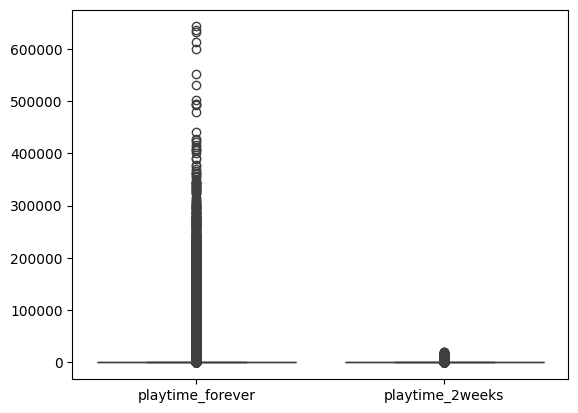

In [34]:
sns.boxplot(df_items[['playtime_forever', 'playtime_2weeks']]);

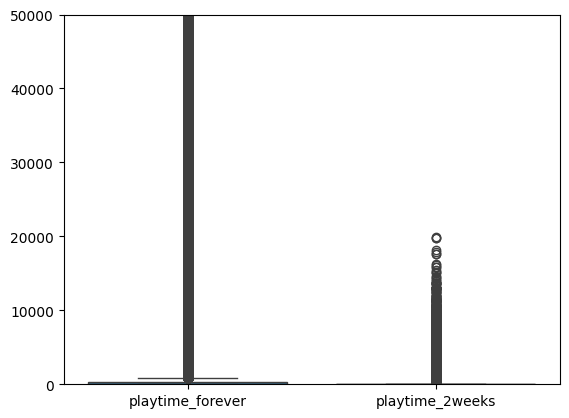

In [35]:
sns.boxplot(df_items[['playtime_forever', 'playtime_2weeks']])
plt.ylim(0,50000);

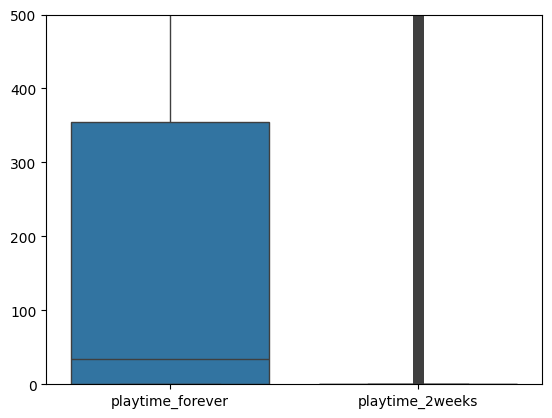

In [36]:
sns.boxplot(df_items[['playtime_forever', 'playtime_2weeks']])
plt.ylim(0,500);

(0.0, 500.0)

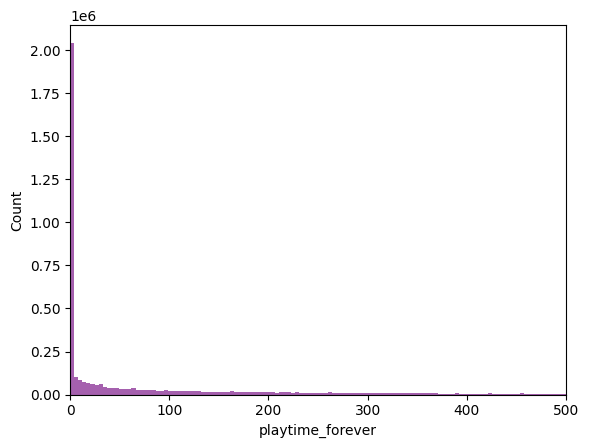

In [39]:
sns.histplot(df_items['playtime_forever'], color='#872b93')
plt.xlim(0,500)

Ya que los valores 0 en playtime pueden ser un indicativo de la acogida que tuvo un juego específico, decido dejarlos en el dataframe.

In [40]:
df_items.head(5)

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,items_count,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...


Se genera un dataframe con los datos caraterísticos ligados a cada usuario, para su uso posterior.

In [42]:
df_usuario = df_items[['user_id', 'playtime_forever', 'playtime_2weeks', 'items_count']] 
df_usuario = df_usuario.groupby('user_id').agg(sum)
df_usuario.reset_index(inplace=True)

In [43]:
df_usuario.head()

,user_id,playtime_forever,playtime_2weeks,items_count
0,--000--,141027,2274,3364
1,--ace--,70382,0,1936
2,--ionex--,48084,599,529
3,-2SV-vuLB-Kg,54249,0,4624
4,-404PageNotFound-,231260,0,22201


In [44]:
len(df_usuario)

70912

No existen valores duplicados en el dataframe de datos de usuario.

In [46]:
df_usuario.duplicated().sum()

np.int64(0)

Ahora vemos el tiempo máximo de juego y su ubicación en el índice.

In [47]:
df_usuario['playtime_forever'].max()

np.int64(4660393)

In [49]:
df_usuario['playtime_forever'].idxmax()

52202

In [50]:
df_usuario.loc[52202]

user_id             REBAS_AS_F-T
playtime_forever         4660393
playtime_2weeks           223199
items_count              3876961
Name: 52202, dtype: object

In [51]:
df_usuario['playtime_forever'].value_counts()

playtime_forever
0        2509
1         140
2          42
3          32
12         30
         ... 
24750       1
34457       1
3831        1
68342       1
61587       1
Name: count, Length: 53201, dtype: int64

Se exporta a parquet los dos dataframes que están en uso actualmente.

In [52]:
df_usuario.to_parquet('caracteristicasusuario.parquet')

In [53]:
df_items.to_parquet('items_usuarios.parquet')

Se genera un dataframe nuevo con las características de cada videojuego

In [54]:
df_features = df_items[['item_id', 'playtime_forever', 'playtime_2weeks']]
df_features = df_features.groupby('item_id').agg(sum)
df_features.reset_index(inplace=True)
df_features.head()

,item_id,playtime_forever,playtime_2weeks
0,10,17107858,46656
1,100,301732,1170
2,10000,62685,0
3,1002,894,0
4,10040,0,0


Observo los juegos que no han sido jugados por los usuarios.

In [55]:
df_features[df_features['playtime_forever'] == 0]  

,item_id,playtime_forever,playtime_2weeks
4,10040,0,0
38,10410,0,0
40,10420,0,0
43,10440,0,0
46,10470,0,0
...,...,...,...
10772,7420,0,0
10809,8010,0,0
10846,8620,0,0
10853,8840,0,0


Verifico si existen valores duplicados y observo la información del dataframe.

In [56]:
df_features.duplicated().sum()

np.int64(0)

In [57]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10978 entries, 0 to 10977
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_id           10978 non-null  object
 1   playtime_forever  10978 non-null  int64 
 2   playtime_2weeks   10978 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 257.4+ KB


Exporto este nuevo dataframe a parquet.

In [58]:
df_features.to_parquet('caracteristicas_juego.parquet')